# Версии



**Версия 3.0:**
*Что нового*
- Добалена выгрузка для кластеризатора ✔️
- Переписана тулза - тулза отдельно, библиотека - отдельно ✔️
- Добавлена возможность брать фразы, предшествующие целевой ✔️
- Парамерт LOOK_FORWARD больше не надо умножать на 2 ✔️
- Добавлена куча багов ✔️

**Версия 2.0:**
*Что нового*
- Вывожу ID звонка ✔️
- Если фраза встречается 2 раза в одном звонке, то в выборку попадают оба ответа ✔️
- Фикс Бага с дублями ✔️

**Версия 1.0:**
*Hello World!*

# Нажать, если запускаешь утилиту впервые

In [ ]:
import wordminelib as wml
wml.install_dependencies(wml.DEPENDENCIES)

# Как это работает

1. Выгружаем из РА .ass файлы, кладем в ./ASS папочку
2. Запускаем блок "запустить 1 раз" только 1 раз)))
3. Движемся вниз по ноутбуку, нажимая кнопку "Run" для нужного блока
4. При необходимости (и желании поувствовать себя Data-сатанистом) можно сходить с выгрузкой в Orange (workflow лежит где-то рядом)

# Сама утилита

In [ ]:
import wordminelib as wml
import os

# Тут живут все настройки

Меняем то, что **жирным**

- **TARGET_PHRASE** - искомая фраза/часть фразы после который мы анализируем **канал**

- **look_forward** - на сколько реплик/строк **ВНЕ ЗАВИСИМОСТИ ОТ РОЛИ** вперед смотрим

- **target_channel** - тот канал, КОТОРЫЙ анализируем

- **STEMMER** - True - если хотим удалять предлоги и союзы, False - если не хотим

ass_list - в скобках путь к субтитрам, ./ - означает "отсюда"

In [ ]:
# Globals
TARGET_PHRASE = 'вы обращались в офис банка или в систему сбербанк'  # фраза, котору мы ищем
LOOK_FORWARD = 3  # На сколько фраз смотрим вперед
LOOK_BACK = 3  # На сколько фраз смотрим назад 
TARGET_CHANNEL = 'Абонент'  # тот канал, КОТОРЫЙ анализируем
STEMMER = False  # Уалить предлоги, союзы и все "лишние" слова? (True / False)

# Settings
ass_list = os.listdir('./ASS_Files')  # папка, где лежат .ass
LOOK_FORWARD = LOOK_FORWARD * 2
DIALECT = '\t'

# Достаем целевые фразы из корпуса (ПОСЛЕ целевого сегмента)
- Или этот блок

In [ ]:
# Возвращает py dict {'Phrases': target_list,'Call_id': target_list_id}
output = wml.phrase_extractor(ass_list, TARGET_PHRASE, LOOK_FORWARD, TARGET_CHANNEL)

# Достаем целевые фразы из корпуса (ДО целевого сегмента)
- Или этот...

In [ ]:
output = wml.phrase_extractor_lookback(ass_list, TARGET_PHRASE, LOOK_BACK, TARGET_CHANNEL)

# Убираем все лишнее

In [ ]:
stopwords = []
if STEMMER:
    stopwords = wml.RUSSIAN_STOPWORDS
# Возвращает list с нормализированными целевыми фразами    
output_phrases_normalized = wml.normalizer(output['Phrases'], stopwords)

# Далее все нажимать не надо, делаем только то, что необходимо

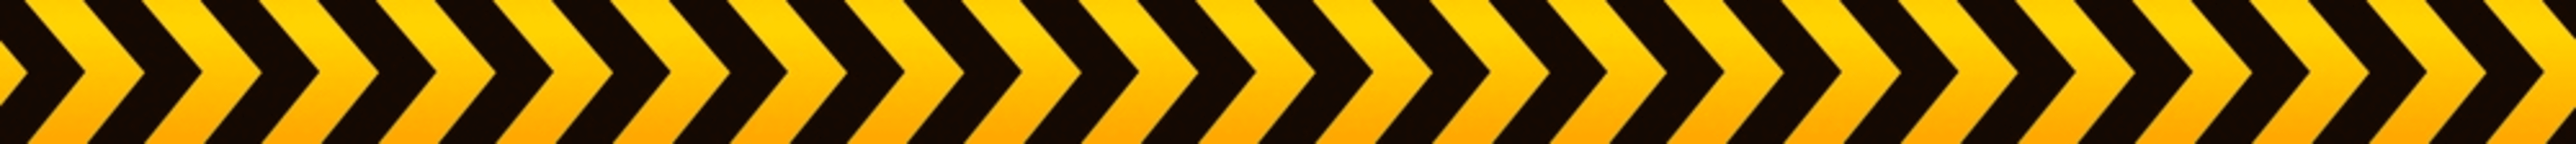

# Выводим результа в консоли

In [ ]:
# Можно использовать для CTRL+C -> CTRL+V
wml.print_output_console(output_phrases_normalized, output['Call_id'])

# Делаем выгрузку в TXT-формате

In [ ]:
wml.create_txt_file(output_phrases_normalized, output['Call_id'])

# Делаем выгрузку в CSV-формате

In [ ]:
wml.create_csv_output(output_phrases_normalized, output['Call_id'], separator=DIALECT)

# Находим ТОП х фраз в выборке

In [ ]:
top = 10
most_occur = wml.count_top_occurrences(output_phrases_normalized, top)

# Выводим ТОП х фраз на график

In [ ]:
wml.create_occur_plot(most_occur)

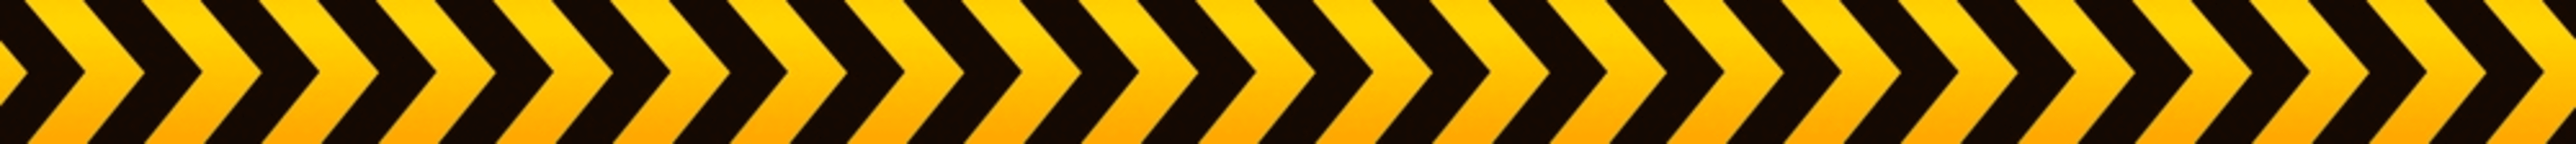

# Осторожно, возможны баги🙈🙉🙊
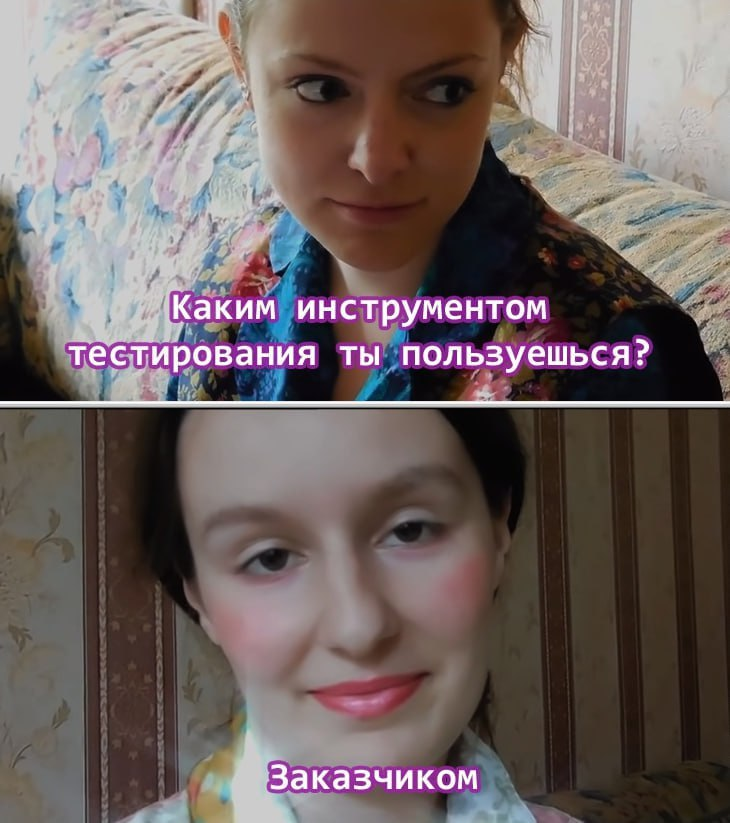